In [1]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import random

In [2]:
A = np.random.randint(0,8,[5,5])
print(A)

[[7 3 0 6 7]
 [2 2 2 4 6]
 [0 1 5 7 5]
 [5 1 3 7 1]
 [5 7 5 4 0]]


In [3]:
def histogram(A, no_levels):
    N, M = A.shape
    
    hist = np.zeros(no_levels).astype(np.int32)
    for i_level in range(no_levels):
        hist[i_level] = np.sum(A == i_level)
    
    return hist

In [4]:
hist_A = histogram(A, 8)
hist_A

array([3, 3, 3, 2, 2, 5, 2, 5], dtype=int32)

Text(0, 0.5, 'Frequency')

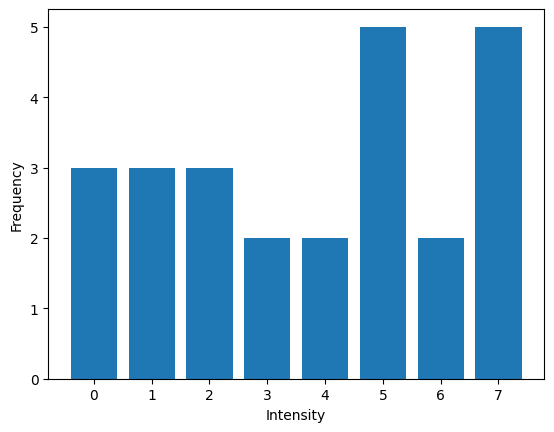

In [5]:
plt.bar(range(8), hist_A)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

In [17]:
img1 = imageio.imread(input())
img2 = imageio.imread(input())

data/nap.jpg
data/scarlett.jpg


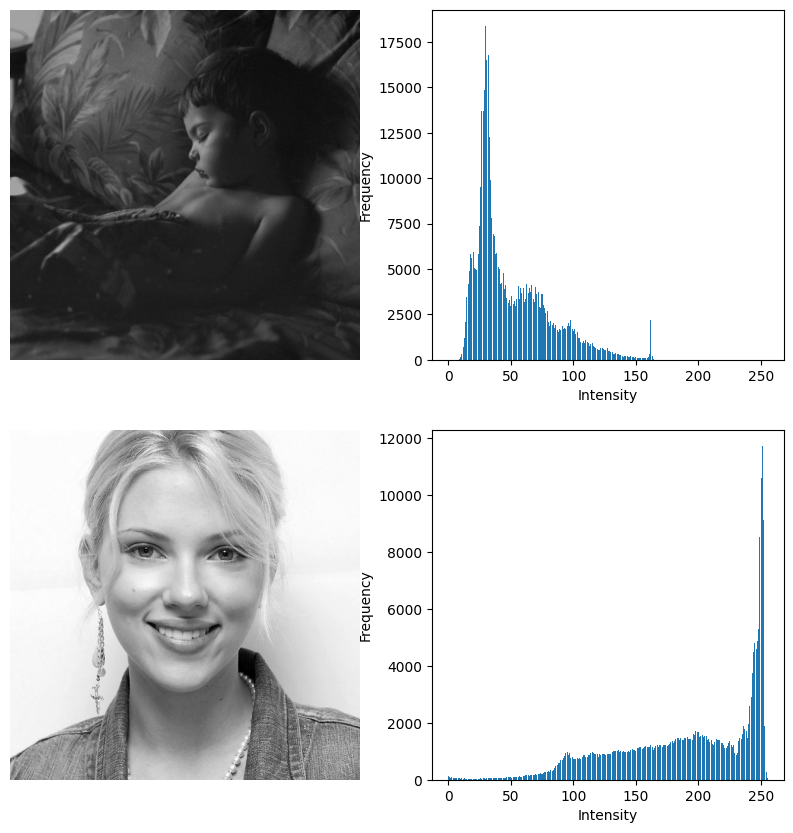

In [18]:
hist_img1 = histogram(img1, 256)
hist_img2 = histogram(img2, 256)

plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(223)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(222)
plt.bar(range(256), hist_img1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.subplot(224)
plt.bar(range(256), hist_img2)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.show()

In [29]:
def histogram_equalization(A, no_levels):
    hist = histogram(A, no_levels)
    histC = np.zeros(no_levels).astype(np.int32)
    
    histC[0] = hist[0]
    for i in range(1, no_levels):
        histC[i] = hist[i] + histC[i-1]
    
    hist_transf = np.zeros(no_levels).astype(np.uint8)
    N, M = A.shape
    A_eq = np.zeros(A.shape).astype(np.uint8)
    
    for z in range(no_levels):
        hist_transf[z] = (((no_levels-1) * histC[z]) / (M*N))
        A_eq[np.where(A == z)] = hist_transf[z]

    return (A_eq, hist_transf)

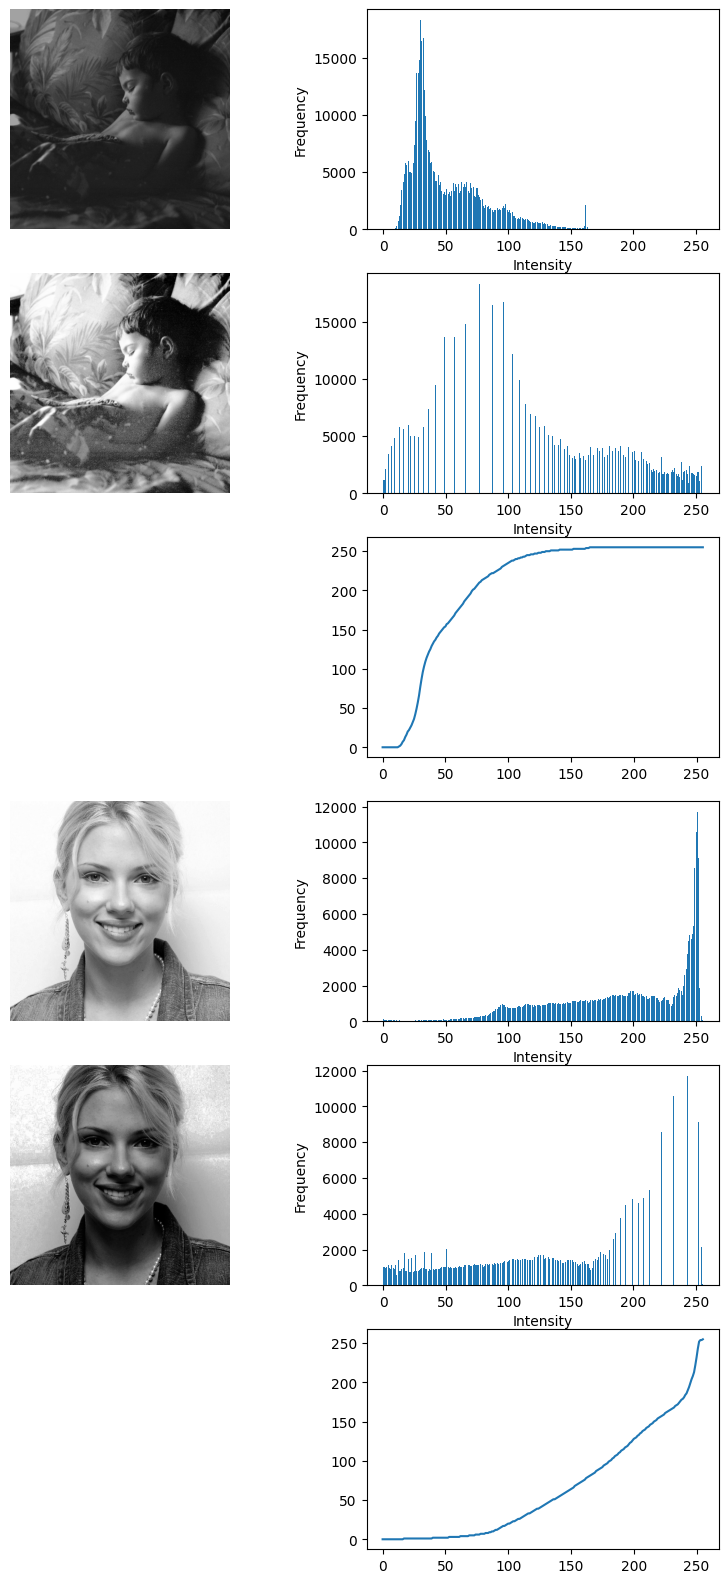

In [36]:
img1_eq, img1_eq_transf = histogram_equalization(img1, 256)
img2_eq, img2_eq_transf = histogram_equalization(img2, 256)

plt.figure(figsize=(10,20))

plt.subplot(6,2,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(6,2,2)
plt.bar(range(256), hist_img1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(6,2,3)
plt.imshow(img1_eq, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(6,2,4)
plt.bar(range(256), histogram(img1_eq, 256))
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(6,2,6)
plt.plot(range(256), img1_eq_transf)

plt.subplot(6,2,7)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(6,2,8)
plt.bar(range(256), hist_img2)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(6,2,9)
plt.imshow(img2_eq, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(6,2,10)
plt.bar(range(256), histogram(img2_eq, 256))
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(6,2,12)
plt.plot(range(256), img2_eq_transf)

plt.show()